# 請結合前面的知識與程式碼，比較不同的 optimizer 與 learning rate 組合對訓練的結果與影響
### 常見的 optimizer 包含
* SGD
* RMSprop
* AdaGrad
* Adam

In [1]:
import os
import keras

# Disable GPU
# os.environ["CUDA_VISIBLE_DEVICES"] = ""

Using TensorFlow backend.


In [2]:
train, test = keras.datasets.cifar10.load_data()

In [3]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [4]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [5]:
def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128]):
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(input_layer)
        else:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [6]:
## 超參數設定
"""
Set your required experiment parameters
"""
LEARNING_RATE = [1e-1, 1e-3, 1e-5]
EPOCHS = 50
BATCH_SIZE = 256
MOMENTUM = 0.95
OPT = ["SGD", "ADAM"]

In [8]:
results = {}
"""
建立你的訓練與實驗迴圈並蒐集資料
"""
for lr in LEARNING_RATE:
    for opt in OPT:
        keras.backend.clear_session() # 把舊的 Graph 清掉
        print("Experiment with LR = %.6f with %s" % (lr, opt))
        model = build_mlp(input_shape=x_train.shape[1:])
        model.summary()
        if opt == "SGD":
            optimizer = keras.optimizers.SGD(lr=lr, nesterov=True, momentum=MOMENTUM)
        else:
            optimizer = keras.optimizers.Adam(lr=lr, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0,
amsgrad=False)
        
        model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

        model.fit(x_train, y_train, 
                  epochs=EPOCHS, 
                  batch_size=BATCH_SIZE, 
                  validation_data=(x_test, y_test), 
                  shuffle=True)

        # Collect results
        train_loss = model.history.history["loss"]
        valid_loss = model.history.history["val_loss"]
        train_acc = model.history.history["acc"]
        valid_acc = model.history.history["val_acc"]

        exp_name_tag = "exp-lr-%s-%s" % (str(lr), opt)
        results[exp_name_tag] = {'train-loss': train_loss,
                                 'valid-loss': valid_loss,
                                 'train-acc': train_acc,
                                 'valid-acc': valid_acc}


Experiment with LR = 0.100000 with SGD
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________
Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [===================

Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 2s 42us/step - loss: 14.4464 - acc: 0.0998 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 2/50
50000/50000 [==============================] - 2s 36us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 3/50
50000/50000 [==============================] - 2s 34us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 4/50
50000/50000 [==============================] - 2s 35us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 5/50
50000/50000 [==============================] - 2s 34us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 6/50
50000/50000 [==============================] - 2s 34us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 7/50
50000/50000 [==============================] - 2s 34us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.

50000/50000 [==============================] - 2s 36us/step - loss: 2.0044 - acc: 0.2826 - val_loss: 1.8392 - val_acc: 0.3563
Epoch 2/50
50000/50000 [==============================] - 2s 32us/step - loss: 1.7840 - acc: 0.3738 - val_loss: 1.7425 - val_acc: 0.3906
Epoch 3/50
50000/50000 [==============================] - 2s 33us/step - loss: 1.7026 - acc: 0.4026 - val_loss: 1.6782 - val_acc: 0.4157
Epoch 4/50
50000/50000 [==============================] - 2s 32us/step - loss: 1.6465 - acc: 0.4233 - val_loss: 1.6322 - val_acc: 0.4223
Epoch 5/50
50000/50000 [==============================] - 2s 32us/step - loss: 1.6036 - acc: 0.4381 - val_loss: 1.6118 - val_acc: 0.4258
Epoch 6/50
50000/50000 [==============================] - 2s 32us/step - loss: 1.5675 - acc: 0.4510 - val_loss: 1.5621 - val_acc: 0.4451
Epoch 7/50
50000/50000 [==============================] - 2s 33us/step - loss: 1.5368 - acc: 0.4583 - val_loss: 1.5416 - val_acc: 0.4544
Epoch 8/50
50000/50000 [============================

50000/50000 [==============================] - 2s 35us/step - loss: 1.7160 - acc: 0.3865 - val_loss: 1.6803 - val_acc: 0.3956
Epoch 3/50
50000/50000 [==============================] - 2s 34us/step - loss: 1.6343 - acc: 0.4173 - val_loss: 1.6088 - val_acc: 0.4253
Epoch 4/50
50000/50000 [==============================] - 2s 35us/step - loss: 1.5609 - acc: 0.4441 - val_loss: 1.5510 - val_acc: 0.4472
Epoch 5/50
50000/50000 [==============================] - 2s 35us/step - loss: 1.5113 - acc: 0.4616 - val_loss: 1.5263 - val_acc: 0.4503
Epoch 6/50
50000/50000 [==============================] - 2s 35us/step - loss: 1.4687 - acc: 0.4769 - val_loss: 1.5130 - val_acc: 0.4589
Epoch 7/50
50000/50000 [==============================] - 2s 35us/step - loss: 1.4443 - acc: 0.4887 - val_loss: 1.4527 - val_acc: 0.4875
Epoch 8/50
50000/50000 [==============================] - 2s 36us/step - loss: 1.4098 - acc: 0.4992 - val_loss: 1.4803 - val_acc: 0.4730
Epoch 9/50
50000/50000 [============================

50000/50000 [==============================] - 2s 33us/step - loss: 2.2766 - acc: 0.1559 - val_loss: 2.2645 - val_acc: 0.1693
Epoch 4/50
50000/50000 [==============================] - 2s 33us/step - loss: 2.2597 - acc: 0.1728 - val_loss: 2.2485 - val_acc: 0.1809
Epoch 5/50
50000/50000 [==============================] - 2s 32us/step - loss: 2.2444 - acc: 0.1837 - val_loss: 2.2339 - val_acc: 0.1904
Epoch 6/50
50000/50000 [==============================] - 2s 32us/step - loss: 2.2305 - acc: 0.1934 - val_loss: 2.2205 - val_acc: 0.1996
Epoch 7/50
50000/50000 [==============================] - 2s 33us/step - loss: 2.2175 - acc: 0.1997 - val_loss: 2.2079 - val_acc: 0.2091
Epoch 8/50
50000/50000 [==============================] - 2s 32us/step - loss: 2.2051 - acc: 0.2077 - val_loss: 2.1958 - val_acc: 0.2141
Epoch 9/50
50000/50000 [==============================] - 2s 32us/step - loss: 2.1931 - acc: 0.2141 - val_loss: 2.1841 - val_acc: 0.2203
Epoch 10/50
50000/50000 [===========================

50000/50000 [==============================] - 2s 35us/step - loss: 1.8150 - acc: 0.3666 - val_loss: 1.7986 - val_acc: 0.3670
Epoch 5/50
50000/50000 [==============================] - 2s 35us/step - loss: 1.7802 - acc: 0.3768 - val_loss: 1.7695 - val_acc: 0.3778
Epoch 6/50
50000/50000 [==============================] - 2s 35us/step - loss: 1.7512 - acc: 0.3903 - val_loss: 1.7399 - val_acc: 0.3877
Epoch 7/50
50000/50000 [==============================] - 2s 34us/step - loss: 1.7261 - acc: 0.3983 - val_loss: 1.7177 - val_acc: 0.4016
Epoch 8/50
50000/50000 [==============================] - 2s 34us/step - loss: 1.7039 - acc: 0.4045 - val_loss: 1.6978 - val_acc: 0.4060
Epoch 9/50
50000/50000 [==============================] - 2s 34us/step - loss: 1.6853 - acc: 0.4122 - val_loss: 1.6818 - val_acc: 0.4114
Epoch 10/50
50000/50000 [==============================] - 2s 34us/step - loss: 1.6667 - acc: 0.4190 - val_loss: 1.6682 - val_acc: 0.4149
Epoch 11/50
50000/50000 [==========================

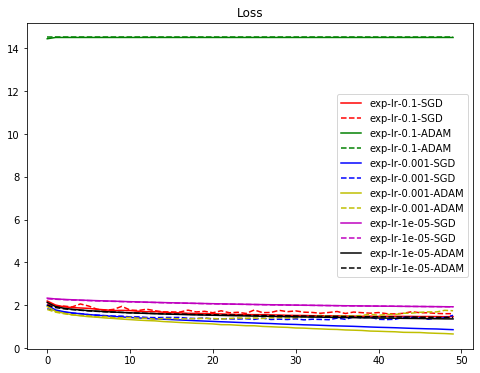

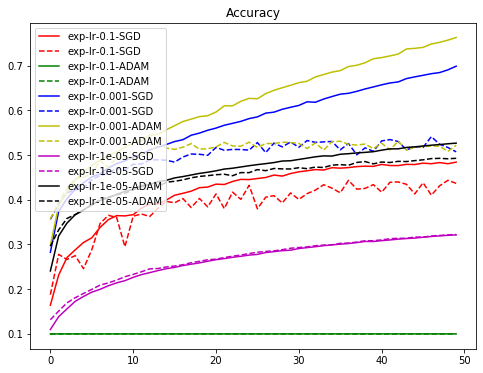

In [9]:
import matplotlib.pyplot as plt
%matplotlib inline

color_bar = ["r", "g", "b", "y", "m", "k"]

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()